In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [7]:
df=pd.read_csv('titanic.csv')
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Cabin']=df['Cabin'].fillna(df['Cabin'].mode()[0])
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
df["Pclass"]=df["Pclass"].apply(str)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [16]:
for col in df.dtypes[df.dtypes=='object'].index:
    for_dummy=df.pop(col)
    df=pd.concat([df,pd.get_dummies(for_dummy,prefix=col)],axis=1)
df.head()

PassengerId  Survived   Age  SibSp  Parch     Fare  Pclass_1  Pclass_2  \
0            1         0  22.0      1      0   7.2500         0         0   
1            2         1  38.0      1      0  71.2833         1         0   
2            3         1  26.0      0      0   7.9250         0         0   
3            4         1  35.0      1      0  53.1000         1         0   
4            5         0  35.0      0      0   8.0500         0         0   

   Pclass_3  Name_Abbing, Mr. Anthony  ...  Cabin_F G73  Cabin_F2  Cabin_F33  \
0         1                         0  ...            0         0          0   
1         0                         0  ...            0         0          0   
2         1                         0  ...            0         0          0   
3         0                         0  ...            0         0          0   
4         1                         0  ...            0         0          0   

   Cabin_F38  Cabin_F4  Cabin_G6  Cabin_T  Embarked_C  Embarked_Q  Embarked_S  
0          0         0         0        0           0           0           1  
1          0         0         0        0           1           0           0  
2          0         0         0        0           0           0           1  
3          0         0         0        0           0           0           1  
4          0         0         0        0           0           0           1  

[5 rows x 1733 columns]

In [17]:
df

PassengerId  Survived        Age  SibSp  Parch     Fare  Pclass_1  \
0              1         0  22.000000      1      0   7.2500         0   
1              2         1  38.000000      1      0  71.2833         1   
2              3         1  26.000000      0      0   7.9250         0   
3              4         1  35.000000      1      0  53.1000         1   
4              5         0  35.000000      0      0   8.0500         0   
..           ...       ...        ...    ...    ...      ...       ...   
886          887         0  27.000000      0      0  13.0000         0   
887          888         1  19.000000      0      0  30.0000         1   
888          889         0  29.699118      1      2  23.4500         0   
889          890         1  26.000000      0      0  30.0000         1   
890          891         0  32.000000      0      0   7.7500         0   

     Pclass_2  Pclass_3  Name_Abbing, Mr. Anthony  ...  Cabin_F G73  Cabin_F2  \
0           0         1                         0  ...            0         0   
1           0         0                         0  ...            0         0   
2           0         1                         0  ...            0         0   
3           0         0                         0  ...            0         0   
4           0         1                         0  ...            0         0   
..        ...       ...                       ...  ...          ...       ...   
886         1         0                         0  ...            0         0   
887         0         0                         0  ...            0         0   
888         0         1                         0  ...            0         0   
889         0         0                         0  ...            0         0   
890         0         1                         0  ...            0         0   

     Cabin_F33  Cabin_F38  Cabin_F4  Cabin_G6  Cabin_T  Embarked_C  \
0            0          0         0         0        0           0   
1            0          0         0         0        0           1   
2            0          0         0         0        0           0   
3            0          0         0         0        0           0   
4            0          0         0         0        0           0   
..         ...        ...       ...       ...      ...         ...   
886          0          0         0         0        0           0   
887          0          0         0         0        0           0   
888          0          0         0         0        0           0   
889          0          0         0         0        0           1   
890          0          0         0         0        0           0   

     Embarked_Q  Embarked_S  
0             0           1  
1             0           0  
2             0           1  
3             0           1  
4             0           1  
..          ...         ...  
886           0           1  
887           0           1  
888           0           1  
889           0           0  
890           1           0  

[891 rows x 1733 columns]

In [21]:
label=df.pop("Survived")
df.head()

PassengerId   Age  SibSp  Parch     Fare  Pclass_1  Pclass_2  Pclass_3  \
0            1  22.0      1      0   7.2500         0         0         1   
1            2  38.0      1      0  71.2833         1         0         0   
2            3  26.0      0      0   7.9250         0         0         1   
3            4  35.0      1      0  53.1000         1         0         0   
4            5  35.0      0      0   8.0500         0         0         1   

   Name_Abbing, Mr. Anthony  Name_Abbott, Mr. Rossmore Edward  ...  \
0                         0                                 0  ...   
1                         0                                 0  ...   
2                         0                                 0  ...   
3                         0                                 0  ...   
4                         0                                 0  ...   

   Cabin_F G73  Cabin_F2  Cabin_F33  Cabin_F38  Cabin_F4  Cabin_G6  Cabin_T  \
0            0         0          0          0         0         0        0   
1            0         0          0          0         0         0        0   
2            0         0          0          0         0         0        0   
3            0         0          0          0         0         0        0   
4            0         0          0          0         0         0        0   

   Embarked_C  Embarked_Q  Embarked_S  
0           0           0           1  
1           1           0           0  
2           0           0           1  
3           0           0           1  
4           0           0           1  

[5 rows x 1732 columns]

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df,label,test_size=0.25)

In [26]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [27]:
model.score(X_test,y_test)

0.820627802690583

In [33]:
n_estimators=[1,2,4,8,16,32,64,100,200]
test_results=[]
for estimator in n_estimators:
    model=RandomForestClassifier(n_estimators=estimator,n_jobs=1)
    model.fit(X_train,y_train)
    test_results.append(model.score(X_test,y_test))

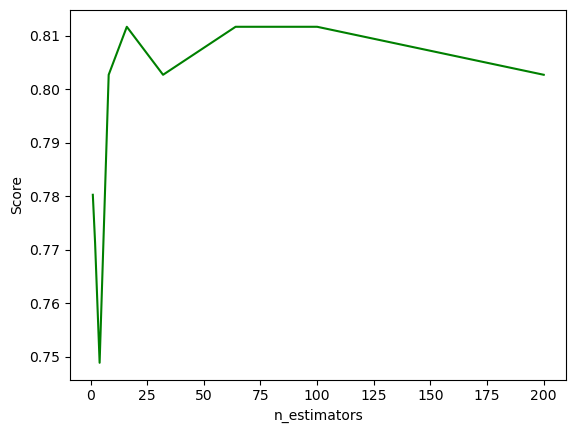

In [34]:
plt.plot(n_estimators,test_results,"g")
plt.xlabel("n_estimators")
plt.ylabel("Score")
plt.show()